In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df  = pd.read_csv('salary_cleaned.csv')

In [37]:
df.drop('Unnamed: 0',inplace = True,axis = 1)

In [38]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,same_state,age,python_yn,R_yn,SparkR_yn,aws_yn,Excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'SparkR_yn', 'aws_yn', 'Excel_yn'],
      dtype='object')

In [39]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'leader' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [40]:
# Adding simplified positions
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [41]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [42]:
# Adding seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        541
senior    199
jr          2
Name: seniority, dtype: int64

In [43]:
# Fix states CA,NJ,TX and UT
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'california' else 'CA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'new jersey' else 'NJ')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'texas' else 'TX')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'utah' else 'UT')

In [44]:
# removing the \n from the company titles
df['company_text'] = df['company_text'].apply(lambda x: x.split("\n")[0] if '\n' in x else x)

In [45]:
# To get the length of the job descriptions
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [46]:
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [47]:
# Compeititors Count
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [48]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)

In [62]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary,axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary,axis = 1)

In [63]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [65]:
df.avg_salary.value_counts()

87.5     12
140.0    11
81.0     11
107.5    10
84.5     10
         ..
157.0     1
137.5     1
69.0      1
40.5      1
145.5     1
Name: avg_salary, Length: 225, dtype: int64

In [66]:
df.employer_provided.value_counts()

0    725
1     17
Name: employer_provided, dtype: int64

In [67]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,SparkR_yn,aws_yn,Excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,1.0,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.0,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,1.0,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,1.0,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,1.0,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.0,1.000000,1.000000,1.000000,10051.000000,4.000000


In [68]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'SparkR_yn', 'aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

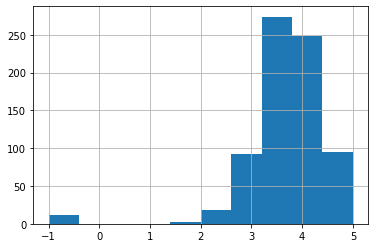

In [69]:
df.Rating.hist()

<AxesSubplot:>

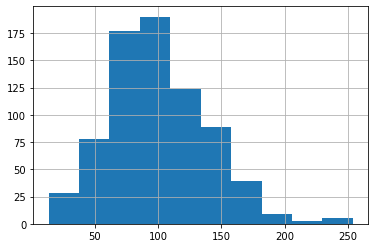

In [70]:
df.avg_salary.hist()

<AxesSubplot:>

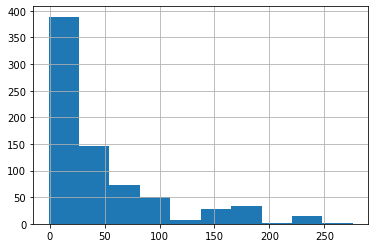

In [71]:
df.age.hist()

<AxesSubplot:>

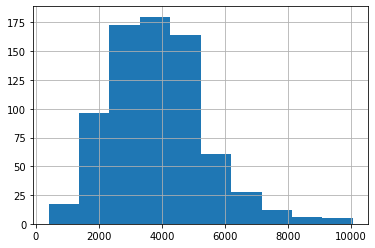

In [72]:
df.desc_len.hist()

<AxesSubplot:>

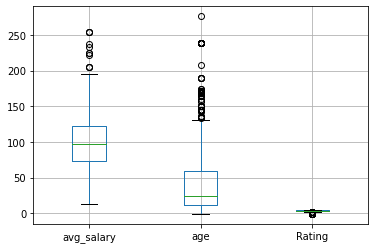

In [73]:
df.boxplot(['avg_salary','age','Rating'])

<AxesSubplot:>

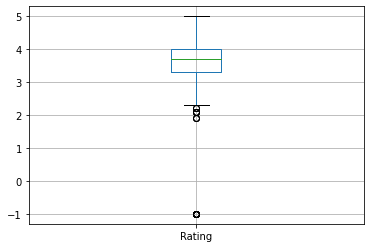

In [74]:
df.boxplot(['Rating'])

In [76]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

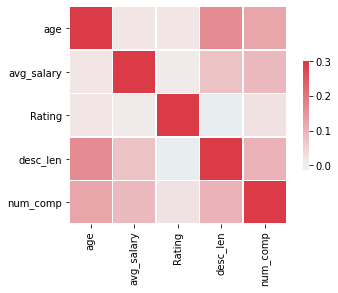

In [77]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),cmap=cmap,vmax =.3,center =0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [78]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'SparkR_yn', 'aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [79]:
df_cat=df[['Location','Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_text','job_state','same_state','python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority']]

Graph for Location: Total = 200


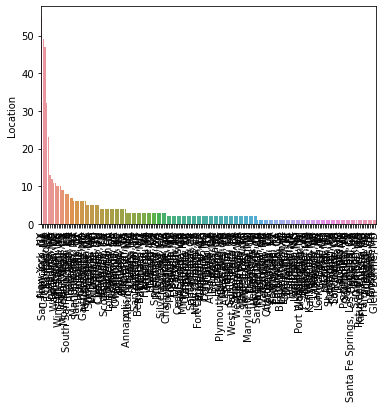

Graph for Headquarters: Total = 198


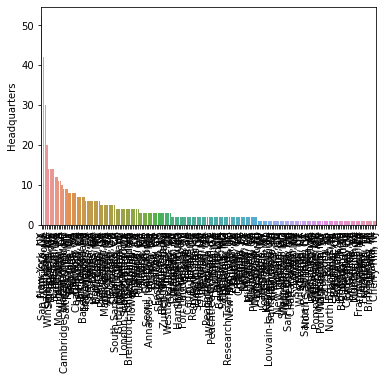

Graph for Size: Total = 9


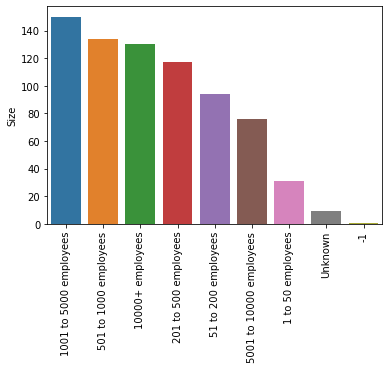

Graph for Type of ownership: Total = 11


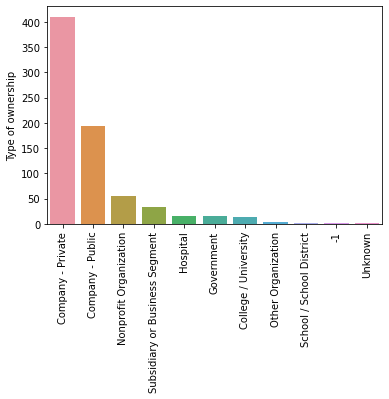

Graph for Industry: Total = 60


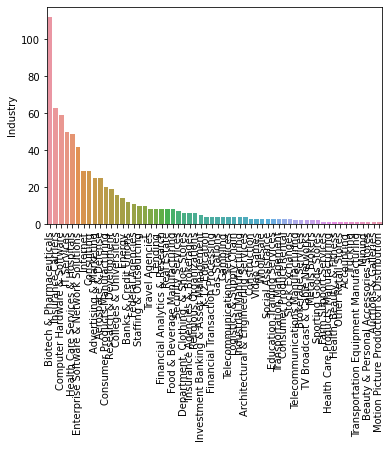

Graph for Sector: Total = 25


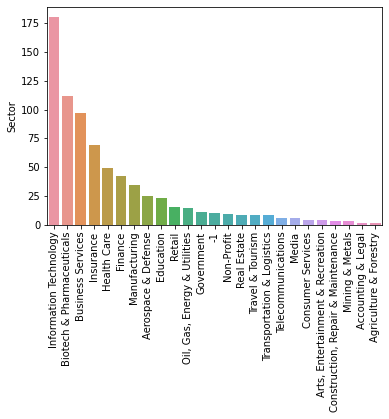

Graph for Revenue: Total = 14


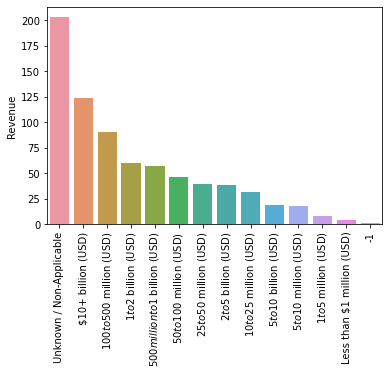

Graph for company_text: Total = 343


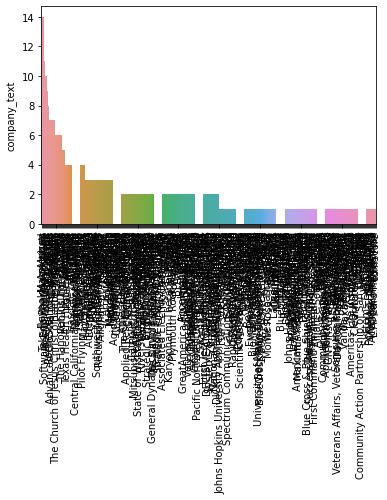

Graph for job_state: Total = 37


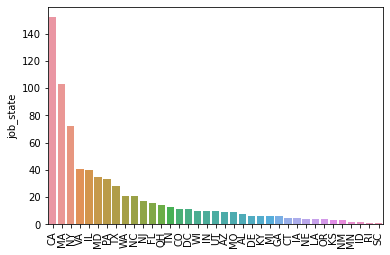

Graph for same_state: Total = 2


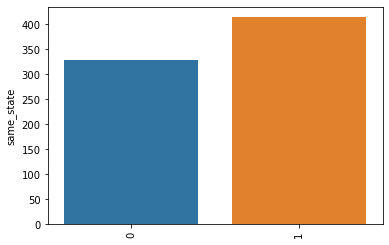

Graph for python_yn: Total = 2


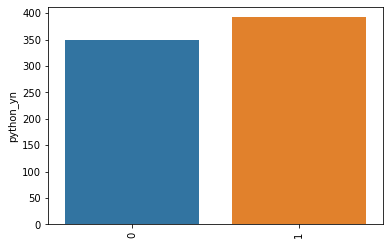

Graph for R_yn: Total = 1


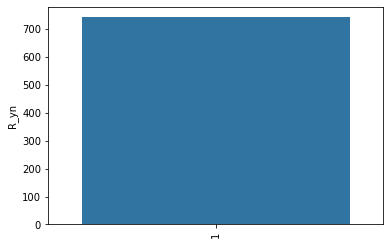

Graph for SparkR_yn: Total = 2


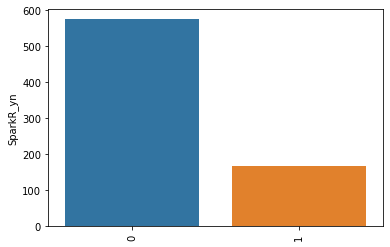

Graph for aws_yn: Total = 2


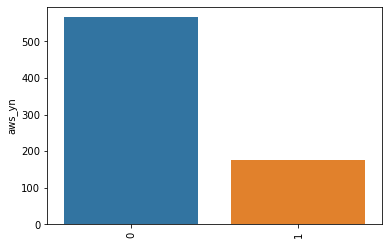

Graph for Excel_yn: Total = 2


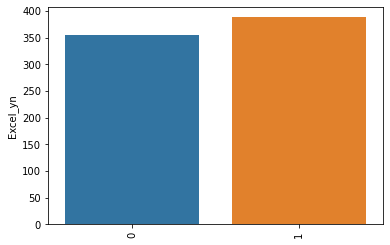

Graph for job_simp: Total = 7


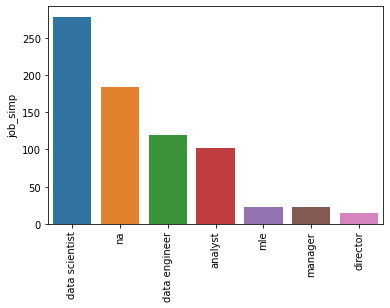

Graph for seniority: Total = 3


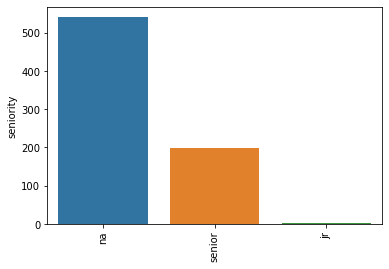

In [80]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: Total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20


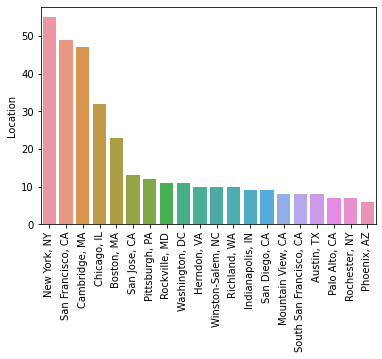

Graph for Headquarters: Total = 20


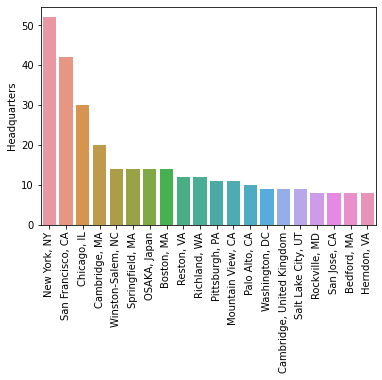

Graph for Industry: Total = 20


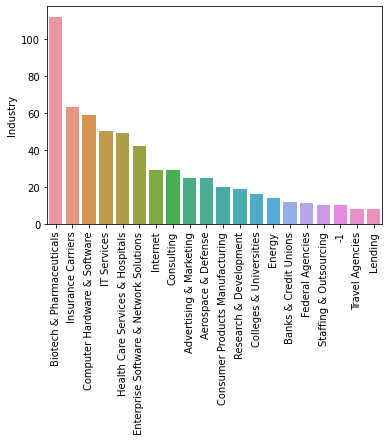

Graph for company_text: Total = 20


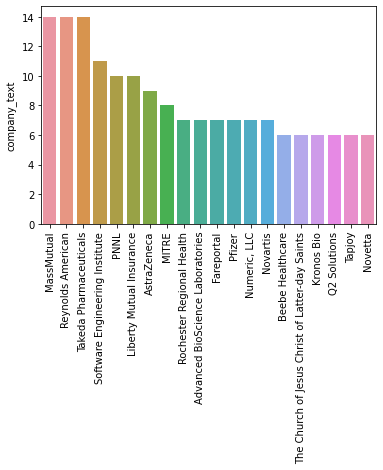

In [82]:
 for i in df_cat[['Location','Headquarters','Industry','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: Total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [83]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'SparkR_yn', 'aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [84]:
pd.pivot_table(df,index='job_simp',values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [85]:
pd.pivot_table(df,index=['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.292208
               senior      80.895833
data engineer  na         101.769663
               senior     116.183333
data scientist jr         106.500000
               na         109.658163
               senior     136.597561
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          74.093750
               senior     109.446429

In [86]:
pd.pivot_table(df,index='job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [87]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [88]:
pd.pivot_table(df,index=['job_state','job_simp'],values = 'avg_salary',aggfunc='count').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        analyst                  5
          data engineer            1
          na                       2
AZ        analyst                  1
          data engineer            5
          data scientist           1
          na                       2
CA        mle                      5
          manager                  9
          na                      27
          data engineer           25
          analyst                 18
          data scientist          68
CO        analyst                  1
          data engineer            3
          data scientist           3
          mle                      1
          na                       3
CT        data scientist           2
          na                       3
DC        analyst                  2
          data engineer            4
          data scientist           5
DE        na                       6
FL        data engineer            3
          data scientist           7
          analyst                  6
GA        data scientist           3
          na                       3
IA        analyst                  2
          data engineer            3
ID        analyst                  2
IL        na                       6
          analyst                  3
          data engineer            8
          data scientist          15
          director                 6
          mle                      2
IN        na                       4
          data scientist           2
          data engineer            4
KS        mle                      3
KY        data scientist           2
          na                       4
LA        analyst                  1
          data engineer            2
          na                       1
MA        manager                  5
          director                 6
          na                      46
          data engineer           12
          analyst                  4
          data scientist          30
MD        data scientist          13
          na                      16
          analyst                  3
          data engineer            3
MI        data scientist           4
          manager                  2
MN        analyst                  1
          data engineer            1
MO        analyst                  2
          data scientist           3
          manager                  1
          na                       3
NC        data engineer            6
          data scientist           3
          na                      12
NE        na                       4
NJ        na                       1
          manager                  2
          director                 2
          data engineer            2
          data scientist           4
          analyst                  6
NM        data scientist           3
NY        analyst                 14
          data engineer            4
          data scientist          40
          mle                      2
          na                      12
OH        na                       3
          analyst                  4
          data scientist           7
OR        data scientist           3
          data engineer            1
PA        analyst                  8
          data engineer            1
          data scientist           6
          manager                  3
          mle                      7
          na                       8
RI        analyst                  1
SC        na                       1
TN        analyst                  2
          data engineer           10
          data scientist           1
TX        data scientist          13
          na                       7
          data engineer            8
UT        analyst                  4
          data engineer            3
          data scientist           3
VA        analyst                  6
          data engineer           10
          data scientist          18
          mle                 

In [89]:
pd.pivot_table(df[df.job_simp=='data scientist'],index='job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False) 

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [90]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'SparkR_yn', 'aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [91]:
df_pivots = df[['Rating','Industry','Sector','Revenue','num_comp','hourly','employer_provided','python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn','Type of ownership','avg_salary']]

In [92]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i,values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [93]:
pd.pivot_table(df_pivots,index = 'Revenue',columns = 'python_yn',values = 'avg_salary')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),80.875000,119.843750
$10+ billion (USD),102.393939,129.698276
$100 to $500 million (USD),67.319149,100.068182
$2 to $5 billion (USD),79.000000,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


In [94]:
pd.pivot_table(df_pivots,index = 'Revenue',columns = 'python_yn',values = 'avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [95]:
# Generate a Word Cloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import  nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

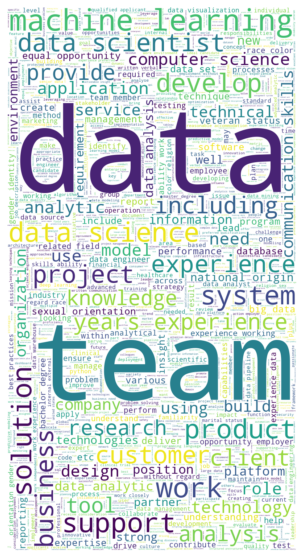

In [96]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = punctuation_stop(words)

text = " ".join([ele for ele in word_filtered])

wc = WordCloud(background_color="white",random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [98]:
df.to_csv('edu_data.csv')